# Text Vectorizaition and Clustering

## Text Vectorization:
The process to transform text data to numerical vectors.

### Why do we need text vectorization?
Think back to when we learned about Label Encoding and One-Hot Encoding: We took categories (text) and transformed them into numerical values. Text vectorization is similar in that we are taking text and turning it into something a machine can understand and manipulate by translating a word in to a unique vector of numbers. For example, we could associate the unique vector (0, 1, 0, 1) to the word queen.

### Use Cases for Text Vectorization
1. Count the number of unique words in each sentence (Bag-of-Words, we'll discuss this shortly!)
2. Assign weights to each word in the sentence.
3. Map each word to a number (dictionary with words as key and numbers as values) and represent each sentences as the sequence of numbers

## Bag-of-Words Matrix
Bag-of-Words (BoW) is a matrix where its rows are sentences and its columns are unique words seen across all of the sentences

![title](Images/bag-of-words-matrix.png)

### BoW in SKlearn
We can write a function to return a BoW matrix. Below, we will see how we can build a BoW matrix by calling CountVectorizer in sklearn

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

sentences = ['This is the first sentence.',
             'This one is the second sentence.',
             'And this is the third one.',
             'Is this the first sentence?']

In [2]:
# Create vetorizer and vectorize sentences
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentences)
print(X.toarray())

[[0 1 1 0 0 1 1 0 1]
 [0 0 1 1 1 1 1 0 1]
 [1 0 1 1 0 0 1 1 1]
 [0 1 1 0 0 1 1 0 1]]


In [3]:
# Get the unique words
print(vectorizer.get_feature_names())

['and', 'first', 'is', 'one', 'second', 'sentence', 'the', 'third', 'this']


## Clustering
Clustering is an unsupervised learning method. A cluster is a group of data points that are grouped together due to similarities in their features. This is very often used because we usually don’t have labeled data

**K-Means clustering** is a popular clustering algorithms: it finds a fixed number (k) of clusters in a set of data.

The goal of any cluster algorithm is to find groups (clusters) in the given data

### When do we use clustering?
1. Cluster movie dataset -> We expect the movies which their genres are similar be clustered in the same group
2. News Article Clustering -> We want the News related to science be in the same group, News related to sport be in the same group

## K-means algorithm:
Assumeing that the inputs are $s_1$, $s_2$, ..., $s_n$.

1. Choose a nnumber $K$ arbitrarily.
2. Pick $K$ random points as cluster centers (called centroids)
3. Assign each $s_i$ to nearest cluster by calculating its distance to each centroid
4. Find a new cluster center by taking the average of the assigned points from step 3
5. Repeat Step 3 and 4 until none of the cluster assignments change

In [4]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

# create a sample dataset with 300 data points and 4 cluster centers
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1])

In [5]:
from sklearn.cluster import KMeans

# k-means algorithm where k = 4
km = KMeans(n_clusters=4)
km.fit(X)
print(km.cluster_centers_)

[[ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [ 0.94973532  4.41906906]
 [-1.58438467  2.83081263]]


### How to choose the optimal number (K) of clusters?
We could always choose a high number, but we may be wasting a lot of time and resources when a smaller number would give us the same results. How do we know the best K to pick so that we are running k-means as efficiently as possible?



### The Elbow Method
We can find the optimal K by utilizing the **Elbow Method:** a method that assigns a score to each K. When we plot these scores, we will get a line that looks like an arm bending at the elbow. **The K value that is closest to the "elbow" point; the point of the graph where the direction changes drastically, of the graph is our optimal K**

Scores can be calculated two different ways:

1. **Distortion:** the average of the squared distances from each sample to its closest cluster center. Typically, the Euclidean distance metric is used. The lower the distortion, the better the score
    1. For numberes 1 to k, compute the following:
        1. Euclidean squared distance formula: $\sum_{j=1}^{k} (a_j-b_j)^2$
        1. For each sample, find the squared distance between the sample and all k cluster centers, and then pick the closest center (shortest distance)
        1. Take the average of the above
2. **Inertia:** the sum of squared distances of samples to their closest cluster center. The lower the inertia, the better the score
    1. We'll use the same Euclidean squared distance formula for here as well.
    
Either scoring method is valid, and will give you the same optimal K value. Below we will look at how to implement both scoring methods:

### Distortion

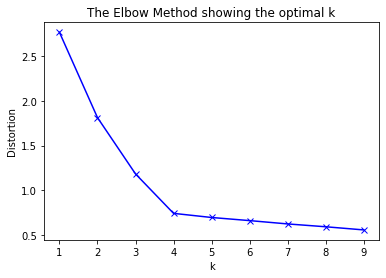

In [6]:
import numpy as np
from scipy.spatial import distance

distortions = []
K = range(1, 10)
for k in K:
    # fit the k-means for a given k to the data (X)
    km = KMeans(n_clusters=k)
    km.fit(X)
    # distance.cdist finds the squared distances
    # axis=1 allows us to keep the min for each sample, not jsut the min across the entire dataset
    # find the closest distance for each sample to a center, and take the average
    distortions.append(sum(np.min(distance.cdist(X, km.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow: bx- = use a solid (-) blue (b) line, 
# and mark the x-axis points with an x (x)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Inertia

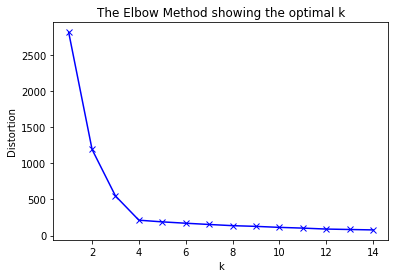

In [7]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X)
    # inertia is an attribute of km!
    # https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
    sum_of_squared_distances.append(km.inertia_)
    

    # Plot the elbow
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Activity: Elbow Method
Using the starter code below, prove that 6 is the optimal K for clustering the data using k-means using the elbow method. You can use either Distortion or Inertia.

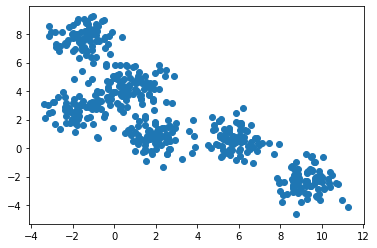

In [8]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

Data, blob_y = make_blobs(n_samples=500, centers=6,
                          random_state=0, cluster_std=0.80)
plt.scatter(Data[:, 0], Data[:, 1])

In [9]:
# Distortions
distortions = []
k = range(1, 10)
for k in K:
    k_means = KMeans(n_clusters=k)
    k_means.fit(Data)
    distortions.append(sum(np.min(distance.cdist(Data, k_means.cluster_centers_, 'euclidean'), axis=1)) 
                       / Data.shape[0])

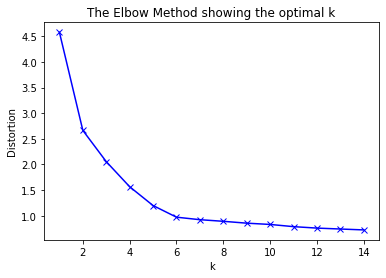

In [10]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Activity: Find how many values are in each cluster 

In [11]:
from collections import Counter

k_means = KMeans(n_clusters=6)
k_means.fit(Data)

Counter(k_means.predict(Data))

Counter({1: 83, 0: 82, 2: 82, 3: 83, 4: 78, 5: 92})

## Activity: Combine Text Vectorization and Clustering the Texts (30 min)
Complete the activity below in groups of 3

1. We want to cluster the given sentences

2. To do this: We to use both concepts we learned today:

    1. Vectorize the sentences (text-vectorization)

    2. Apply Kmeans to cluster our vectorized sentences

**Note:** We want to remove stop words from our sentences (and, or, is, etc.). To do this, we add stop_words='english' to our call to CountVectorize

**Hint:** Look at the sentences in the starter code. How would you cluster the data if you were doing the clustering? Use that number as your K to start with.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

sentences = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(sentences)



model = KMeans(n_clusters=2)
model.fit(X)

Y = vectorizer.transform(['Google can\'t be hungry.'])
print(model.predict(Y))

Y2 = vectorizer.transform(['Kittens can be hungery.' ])
print(model.predict(Y2))

Y3 = vectorizer.transform(['Kittens can be hungery but Google cant.'])
print(model.predict(Y3))

[0]
[1]
[0]
